In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the directories to search for files
directories = ['Analog_Capstone/First_stage', 'Analog_Capstone/Cascade']

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Loop through the directories and process each .TXT file
for directory in directories:
    for file_name in os.listdir(directory):
        if file_name.endswith('.TXT'):  # Check if the file is a .TXT file
            file_path = os.path.join(directory, file_name)
            
            # Count the total number of lines in the file
            with open(file_path, 'r') as f:
                total_lines = sum(1 for line in f)
            
            # Calculate the number of rows to read (excluding the last 3 lines)
            rows_to_read = total_lines - 4 - 2  # Skip first 4 lines and last 3 lines
            
            # Read the data, skipping the first 4 lines and limiting to rows_to_read
            data = pd.read_csv(
                file_path,
                skiprows=4,  # Skip the first 4 lines
                nrows=rows_to_read,  # Exclude the last 3 lines
                delimiter=',',
                names=['Frequency (Hz)', 'Amplitude (V/rtHz)']
            )
            
            # Add a column for the file name
            data['File Name'] = file_name
            
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, data], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

       Frequency (Hz)  Amplitude (V/rtHz)                File Name
0            0.000000        6.814985e-08  ADA4898-1_1.5625kHz.TXT
1            0.244141        7.120856e-08  ADA4898-1_1.5625kHz.TXT
2            0.488281        6.718395e-08  ADA4898-1_1.5625kHz.TXT
3            0.732422        5.527085e-08  ADA4898-1_1.5625kHz.TXT
4            0.976562        4.601054e-08  ADA4898-1_1.5625kHz.TXT
...               ...                 ...                      ...
71777    28795.117154        2.576162e-07     Cascade_Fullspan.TXT
71778    28796.093724        2.544789e-07     Cascade_Fullspan.TXT
71779    28797.070293        2.513871e-07     Cascade_Fullspan.TXT
71780    28798.046862        2.512684e-07     Cascade_Fullspan.TXT
71781    28799.023431        2.449197e-07     Cascade_Fullspan.TXT

[71782 rows x 3 columns]


C:\Users\danie\AppData\Local\Temp\ipykernel_1624\4127722260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_data['Amplitude (nV/rtHz)'] = file_data['Amplitude (V/rtHz)'] * 1e9


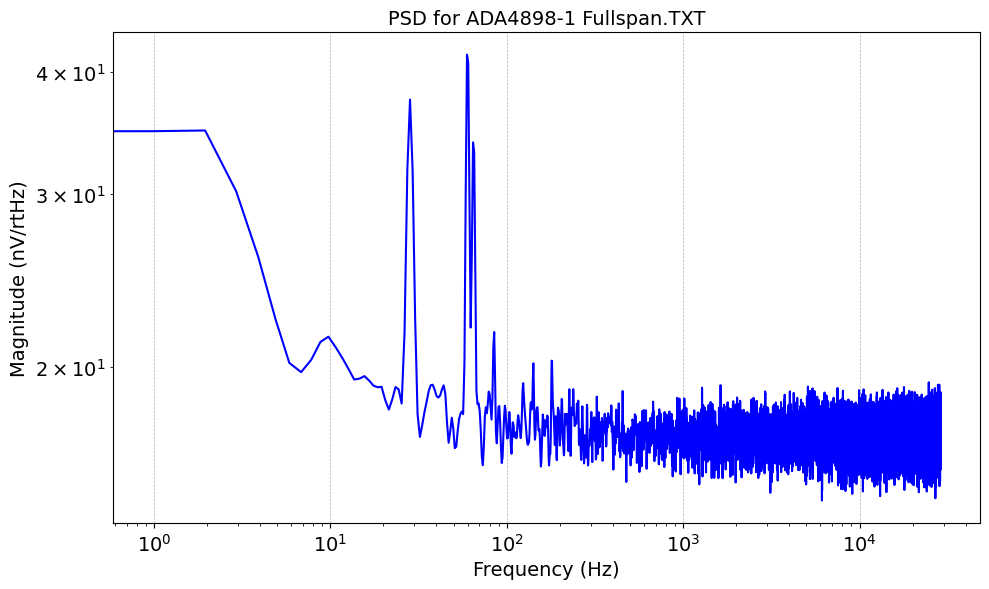

File: ADA4898-1_Fullspan.TXT
  Full PSD Average (adjusted): 17.024434 nV/rtHz
  PSD Average (from index 14745 onwards, adjusted): 17.009586 nV/rtHz



C:\Users\danie\AppData\Local\Temp\ipykernel_1624\4127722260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_data['Amplitude (nV/rtHz)'] = file_data['Amplitude (V/rtHz)'] * 1e9


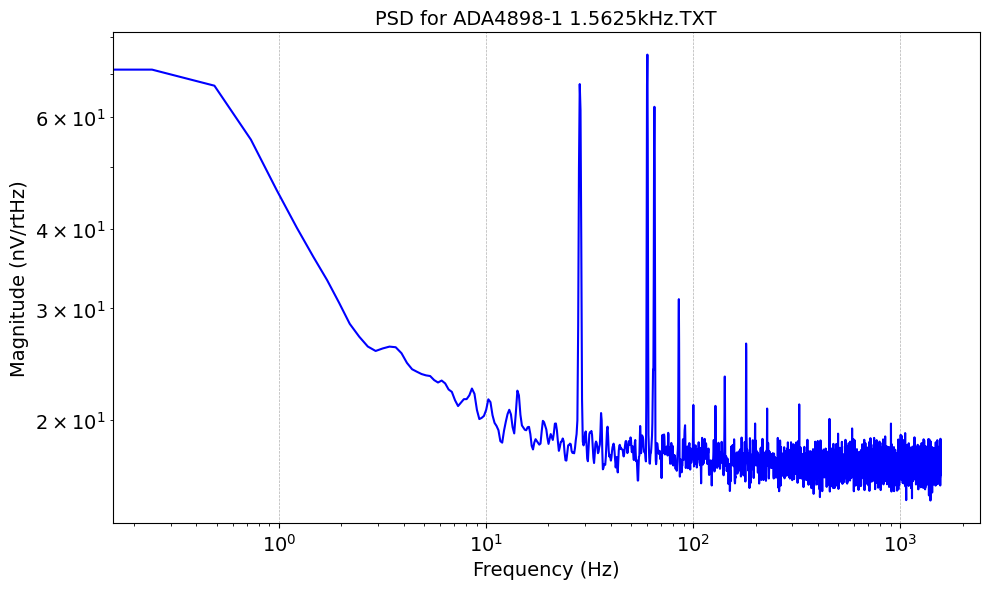

File: ADA4898-1_1.5625kHz.TXT
  Full PSD Average (adjusted): 17.322977 nV/rtHz
  PSD Average (from index 3200 onwards, adjusted): 17.053517 nV/rtHz



C:\Users\danie\AppData\Local\Temp\ipykernel_1624\4127722260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_data['Amplitude (nV/rtHz)'] = file_data['Amplitude (V/rtHz)'] * 1e9


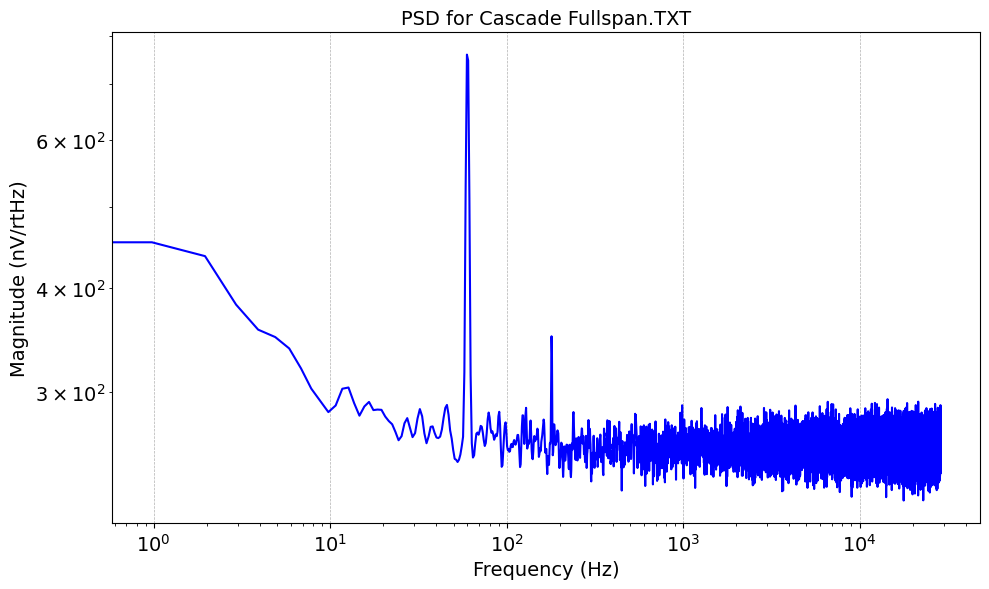

File: Cascade_Fullspan.TXT
  Full PSD Average (adjusted): 257.921494 nV/rtHz
  PSD Average (from index 14745 onwards, adjusted): 257.698500 nV/rtHz



C:\Users\danie\AppData\Local\Temp\ipykernel_1624\4127722260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_data['Amplitude (nV/rtHz)'] = file_data['Amplitude (V/rtHz)'] * 1e9


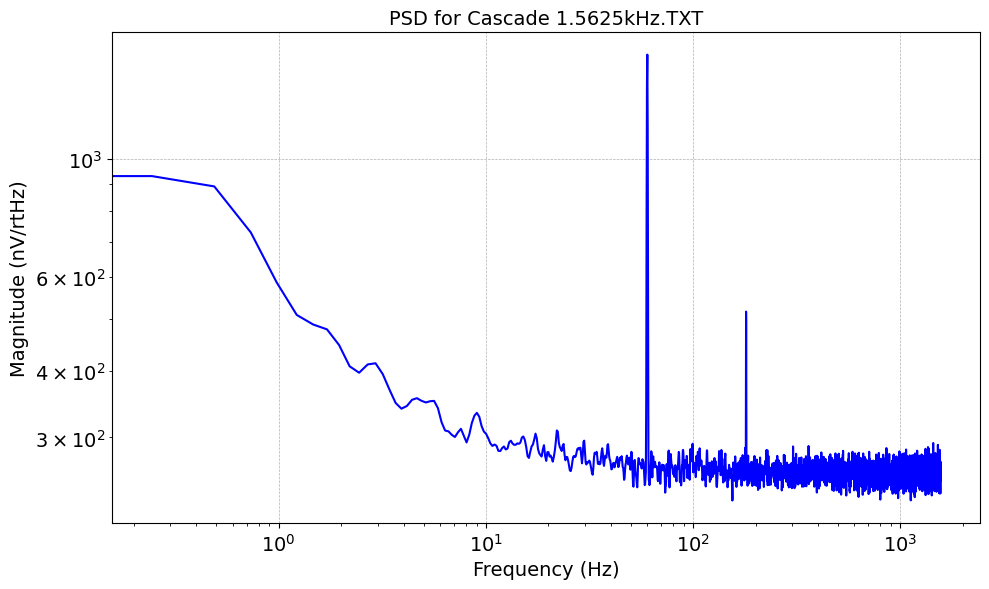

File: Cascade_1.5625kHz.TXT
  Full PSD Average (adjusted): 260.492759 nV/rtHz
  PSD Average (from index 3200 onwards, adjusted): 257.495732 nV/rtHz



In [19]:
# Function to process and plot specific files
def process_and_plot_file(file_name):
    # Filter the DataFrame for the specific file
    file_data = combined_df[combined_df['File Name'] == file_name]

    if file_data.empty:
        print(f"File {file_name} not found in the data!")
        return

    # Convert Amplitude to nV/rtHz
    file_data['Amplitude (nV/rtHz)'] = file_data['Amplitude (V/rtHz)'] * 1e9

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(
        file_data['Frequency (Hz)'], 
        file_data['Amplitude (nV/rtHz)'], 
        label=file_name.replace('_', ' '), 
        linewidth=1.5,
        color='blue'
    )
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"PSD for {file_name.replace('_', ' ')}", fontsize=14)
    plt.xlabel('Frequency (Hz)', fontsize=14)
    plt.ylabel('Magnitude (nV/rtHz)', fontsize=14)
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.tick_params(axis='both', which='both', labelsize=14)
    plt.tight_layout()
    plt.show()

    # Calculating PSD averages in nV/rtHz and subtracting 5 nV/rtHz
    mid_idx = len(file_data) // 2
    full_psd_avg = file_data['Amplitude (nV/rtHz)'].mean()
    idx_psd_avg = file_data['Amplitude (nV/rtHz)'][mid_idx:].mean()

    print(f"File: {file_name}")
    print(f"  Full PSD Average (adjusted): {full_psd_avg:.6f} nV/rtHz")
    print(f"  PSD Average (from index {mid_idx} onwards, adjusted): {idx_psd_avg:.6f} nV/rtHz\n")

# List of specific files to process
files_to_plot = ['ADA4898-1_Fullspan.TXT', 'ADA4898-1_1.5625kHz.TXT', 'Cascade_Fullspan.TXT', 'Cascade_1.5625kHz.TXT']  # Replace with your actual file names

# Process and plot each file in the list
for file_name in files_to_plot:
    process_and_plot_file(file_name)